<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-09-10 23:37:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.1MB/s    in 2.5s    

2025-09-10 23:37:24 (62.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Creating SQL DB To Query Data From Directly**

In [6]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

## MY PERSONAL STACK OF MAPPINGS TO USE THROUGHOUT FOR EASIER RENAMING

In [7]:
## This will hold all mapping data so one time run into Kernal
## And single time loading

# Mapping for SOPartFreq
mapping_partfreq = {
    'Daily or almost daily': 'Daily or Semi-Daily',
    'Multiple times per day': 'Multiple / Day',
    'A few times per week': 'Multiple / Week',
    'Less than once per month or monthly': 'Monthly',
    'A few times per month or weekly': 'Multiple / Month',
    'I have never participated in Q&A on Stack Overflow ': 'Never'
}

# Mapping of Age to String Grouping
mapping_age_text = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}

# Mapping of Age to int
mapping_age_int = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}

# Mapping of YearsProCode to int
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Mapping of Employment
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Mapping of Long Named Countries
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia'
}

# Mapping for Employment Type (Top 5) (DevType)
mapping_devtype = {
    'Developer, full-stack': 'Full-Stack Dev.',
    'Developer, back-end': 'Back-End Dev.',
    'Developer, front-end': 'Front-End Dev.',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Dev.',
    'Developer, mobile': 'Mobile Dev.',
    'Developer, embedded applications or devices': 'Embedded Aps./Devices',
    'Other (please specify)': 'Other',
    'Engineering manager': 'Eng. Manager',
    'Data engineer': 'Data Eng.',
    'DevOps specialist': 'DevOps',
    'Data scientist or machine learning specialist': 'Data/ML Spec.',
    'Research & Development role': 'Research & Dev.',
    'Academic researcher': 'Academic Researcher',
    'Senior Executive (C-Suite, VP, etc.)': 'Senior Exec.',
    'Cloud infrastructure engineer': 'Cloud Infrastructure Eng.',
    'Developer, QA or test': 'QA/Testing Dev.',
    'Developer, game or graphics': 'Gaming/Graphics Dev.',
    'Developer, AI': 'AI Dev.',
    'Data or business analyst': 'Data/Business Analyst',
    'Engineer, site reliability': 'Site Reliability Eng.',
    'System administrator': 'System Admin.',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Pro.',
    'Scientist': 'Scientist',
    'Student': 'Student',
    'Developer Experience': 'Dev. Experience',
    'Educator': 'Educator',
    'Blockchain': 'Blockchain',
    'Product manager': 'Product Manager',
    'Hardware Engineer': 'Hardware Eng.',
    'Developer Advocate': 'Advocate Dev.',
    'Database administrator': 'Database Admin.',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Pro.'
}

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


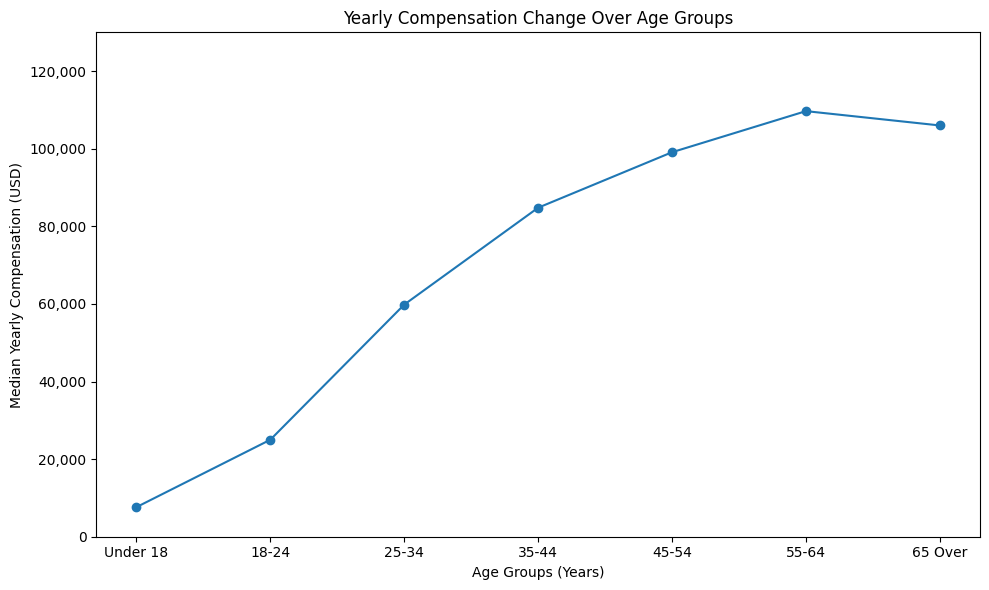

In [8]:
## Write your code here
# Pulling Data
query='''
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].map(mapping_age_text)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df.dropna(subset=['Age'], inplace=True)
df_group = df.groupby('Age', observed=False).median()


# Plotting Data
df_group['ConvertedCompYearly'].plot(kind='line',
                                     figsize=(10,6),
                                     marker='o',
                                     legend=None
                                    )
plt.title('Yearly Compensation Change Over Age Groups')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Median Yearly Compensation (USD)')
plt.ylim(0, 130000)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


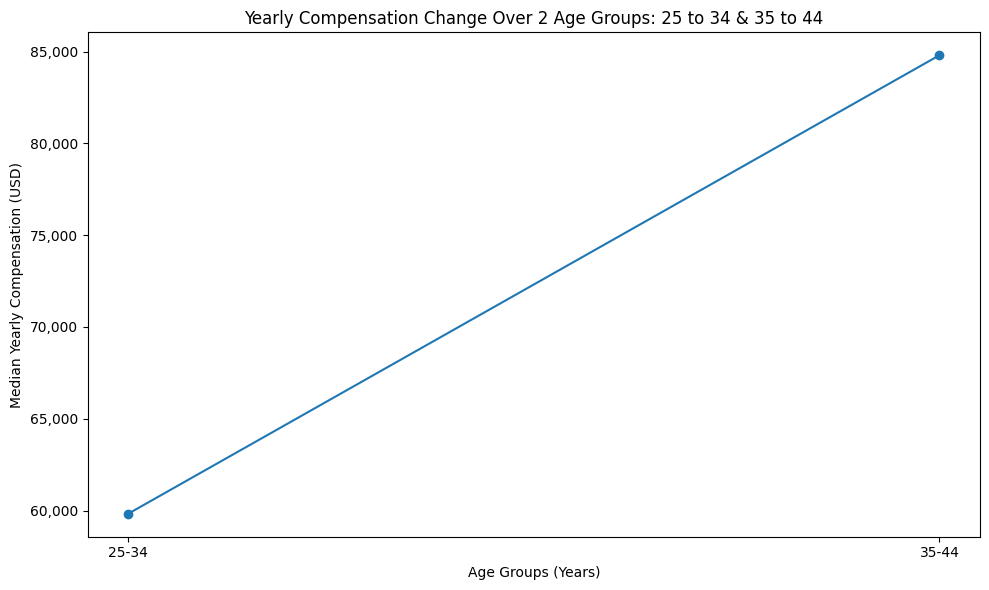

In [9]:
## Write your code here
# Pulling Data
query='''
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
AND ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df['Age'].replace(mapping_age_text)
age_groups = ['25-34', '35-44']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)
df.dropna(subset=['Age'], inplace=True)
df_group = df.groupby('Age', observed=False).median()


# Plotting Data
df_group['ConvertedCompYearly'].plot(kind='line',
                                     figsize=(10,6),
                                     marker='o',
                                     legend=None
                                    )
plt.title('Yearly Compensation Change Over 2 Age Groups: 25 to 34 & 35 to 44')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(ticks=range(len(df_group.index)), labels=df_group.index)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
)
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


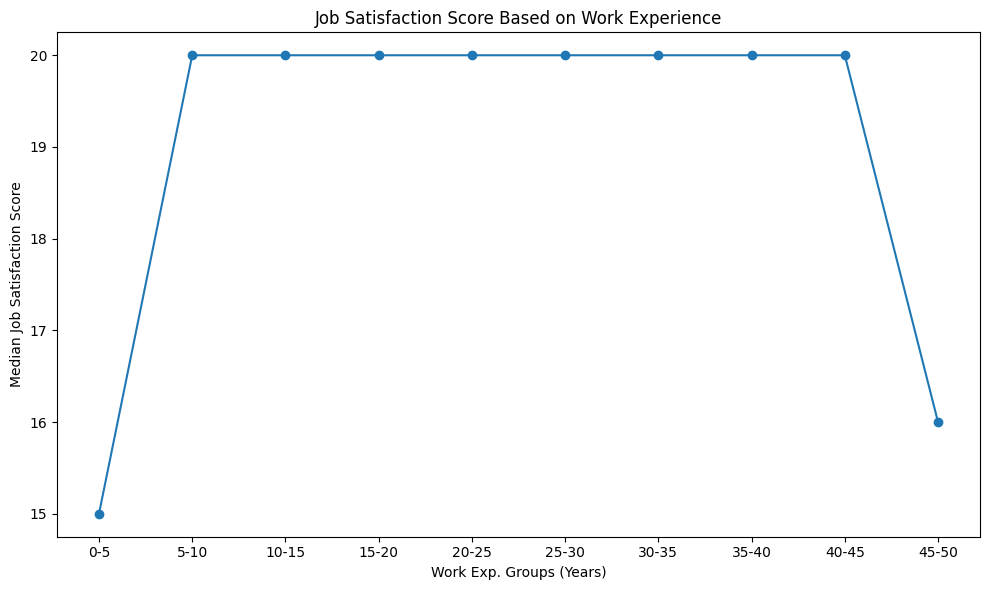

In [10]:
## Write your code here
# Pulling Data
query='''
SELECT WorkExp, JobSatPoints_6
FROM main
WHERE WorkExp IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
bins = [-0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
df['WorkExp_bin'] = pd.cut(df['WorkExp'], bins=bins, labels=labels, 
                       right=True, include_lowest=True)
df_group = df.groupby('WorkExp_bin', observed=False).median()


# # Plotting Data
df_group.reset_index().plot(kind='line',
              x='WorkExp_bin',
              y='JobSatPoints_6',
              figsize=(10,6),
              marker='o',
              legend=None
             )
plt.title('Job Satisfaction Score Based on Work Experience')
plt.xlabel('Work Exp. Groups (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(ticks=range(len(df_group.index)), labels=df_group.index)
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


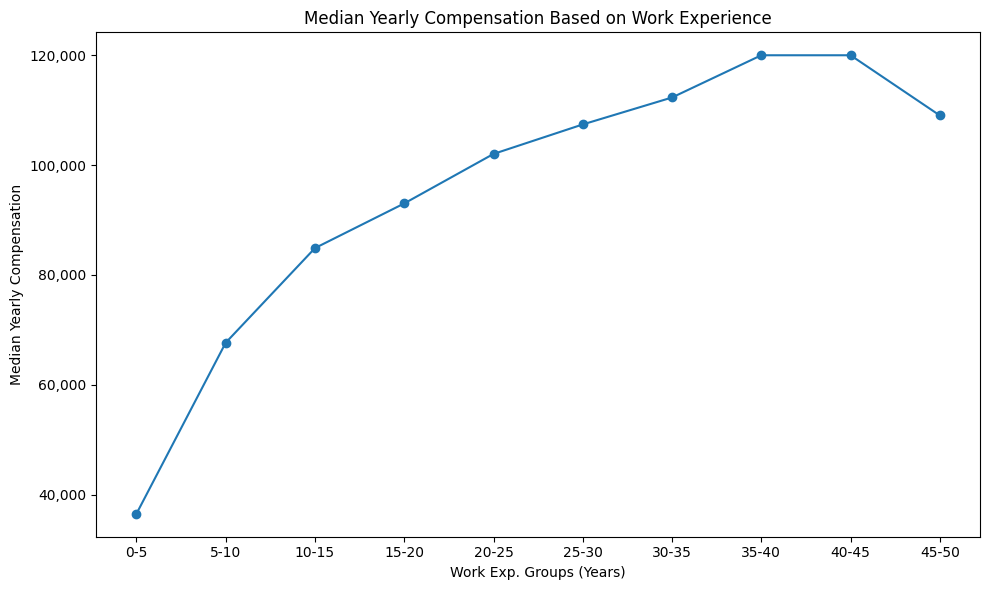

In [11]:
## Write your code here
# Pulling Data
query='''
SELECT WorkExp, ConvertedCompYearly
FROM main
WHERE WorkExp IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)


# Cleaning Data
bins = [-0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
df['WorkExp_bin'] = pd.cut(df['WorkExp'], bins=bins, labels=labels, 
                       right=True, include_lowest=True)
df_group = df.groupby('WorkExp_bin', observed=False).median()

# # Plotting Data
df_group.reset_index().plot(kind='line',
              x='WorkExp_bin',
              y='ConvertedCompYearly',
              figsize=(10,6),
              marker='o',
              legend=None
             )
plt.title('Median Yearly Compensation Based on Work Experience')
plt.xlabel('Work Exp. Groups (Years)')
plt.ylabel('Median Yearly Compensation')
plt.xticks(ticks=range(len(df_group.index)), labels=df_group.index)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
)
plt.tight_layout()
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


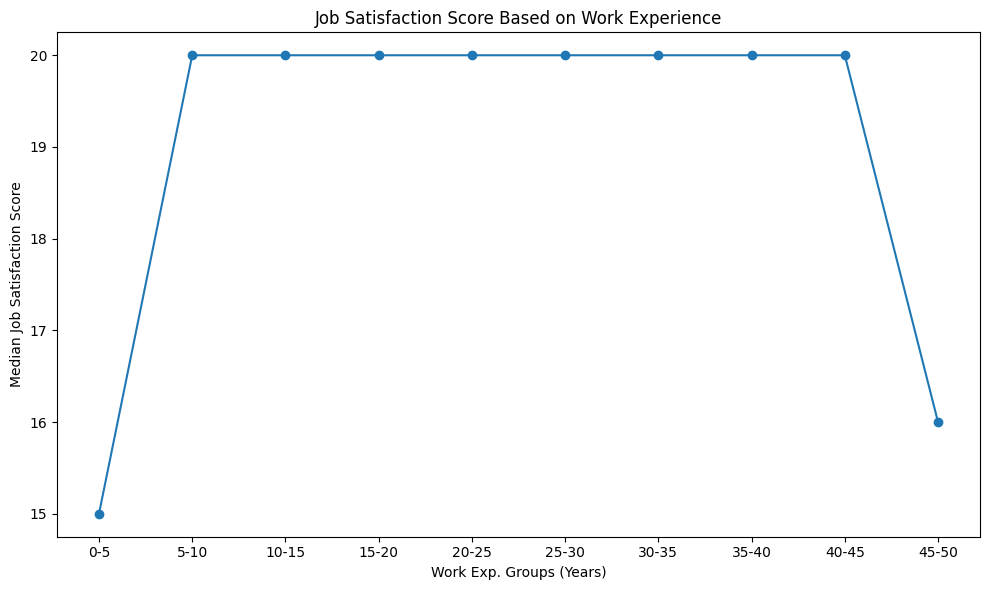

In [12]:
## Write your code here
# Pulling Data
query='''
SELECT WorkExp, JobSatPoints_6
FROM main
WHERE WorkExp IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
bins = [-0.1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
df['WorkExp_bin'] = pd.cut(df['WorkExp'], bins=bins, labels=labels, 
                       right=True, include_lowest=True)
df_group = df.groupby('WorkExp_bin', observed=False).median()


# # Plotting Data
df_group.reset_index().plot(kind='line',
              x='WorkExp_bin',
              y='JobSatPoints_6',
              figsize=(10,6),
              marker='o',
              legend=None
             )
plt.title('Job Satisfaction Score Based on Work Experience')
plt.xlabel('Work Exp. Groups (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(ticks=range(len(df_group.index)), labels=df_group.index)
plt.tight_layout()
plt.show()

In [13]:
# Final step is closing the DB connection
conn.close()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
